## Завдання 1. Застосування алгоритму максимального потоку для логістики товарів

Розробіть програму для моделювання мережі потоків для логістики товарів зі складів до магазинів, використовуючи алгоритм максимального потоку. Проведіть аналіз отриманих результатів і порівняйте їх з теоретичними знаннями.

**Опис завдання**

Побудуйте модель графа, що представляє мережу потоків у наступному зображені:

![](https://s3.eu-north-1.amazonaws.com/lms.goit.files/3d185825-7ca2-4c50-b6e5-8284354af330%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%BD%D1%8F%20%288%29.png)

Зв'язки та пропускні здатності у графі мають наступний вигляд:

| Від        | До         | Пропускна здатність (одиниць) |
| ---------- | ---------- | ----------------------------- |
| Термінал 1 | Склад 1    | 25                            |
| Термінал 1 | Склад 2    | 20                            |
| Термінал 1 | Склад 3    | 15                            |
| Термінал 2 | Склад 3    | 15                            |
| Термінал 2 | Склад 4    | 30                            |
| Термінал 2 | Склад 2    | 10                            |
| Склад 1    | Магазин 1  | 15                            |
| Склад 1    | Магазин 2  | 10                            |
| Склад 1    | Магазин 3  | 20                            |
| Склад 2    | Магазин 4  | 15                            |
| Склад 2    | Магазин 5  | 10                            |
| Склад 2    | Магазин 6  | 25                            |
| Склад 3    | Магазин 7  | 20                            |
| Склад 3    | Магазин 8  | 15                            |
| Склад 3    | Магазин 9  | 10                            |
| Склад 4    | Магазин 10 | 20                            |
| Склад 4    | Магазин 11 | 10                            |
| Склад 4    | Магазин 12 | 15                            |
| Склад 4    | Магазин 13 | 5                             |
| Склад 4    | Магазин 14 | 10                            |

Застосуйте алгоритм максимального потоку для вирішення задачі. Напишіть програму, що реалізує алгоритм Едмондса-Карпа, або скористайтеся вже реалізованою версією для знаходження максимального потоку в побудованому графі. Проведіть аналіз отриманого результату. Чи досягнуто оптимального потоку, і що це означає для розглянутої мережі?

Оформіть звіт з розрахунками та поясненнями. Поясніть, які вершини та ребра було вибрано, як вони відповідають реальним елементам логістичної системи. Покажіть покроковий розрахунок максимального потоку та пояснити логіку кожного кроку.

**Технічні умови**

1. Використовуйте алгоритм Едмондса-Карпа для реалізації максимального потоку.

2. Побудова графа повинна відповідати наведеній структурі з 20 вершинами та заданими пропускними здатностями.


## Рішення 1


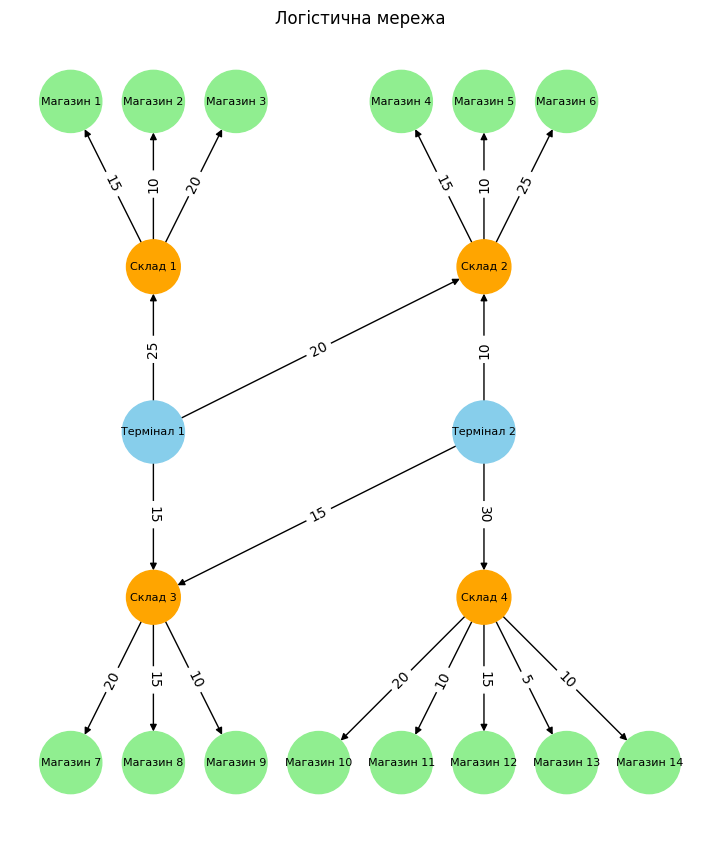

In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# Функція для побудови графа з пропускною здатністю


def build_graph():
    # Створюємо пустий граф
    G = nx.DiGraph()


    # Додаємо ребра з пропускною здатністю
    edges = [
        ("Термінал 1", "Склад 1", 25),
        ("Термінал 1", "Склад 2", 20),
        ("Термінал 1", "Склад 3", 15),
        ("Термінал 2", "Склад 3", 15),
        ("Термінал 2", "Склад 4", 30),
        ("Термінал 2", "Склад 2", 10),
        ("Склад 1", "Магазин 1", 15),
        ("Склад 1", "Магазин 2", 10),
        ("Склад 1", "Магазин 3", 20),
        ("Склад 2", "Магазин 4", 15),
        ("Склад 2", "Магазин 5", 10),
        ("Склад 2", "Магазин 6", 25),
        ("Склад 3", "Магазин 7", 20),
        ("Склад 3", "Магазин 8", 15),
        ("Склад 3", "Магазин 9", 10),
        ("Склад 4", "Магазин 10", 20),
        ("Склад 4", "Магазин 11", 10),
        ("Склад 4", "Магазин 12", 15),
        ("Склад 4", "Магазин 13", 5),
        ("Склад 4", "Магазин 14", 10),
    ]


    # Додаємо ребра до графа
    for start, end, capacity in edges:
        G.add_edge(start, end, capacity=capacity)


    return G


# Функція для відображення графа
def draw_graph(G, flow_distribution=None, max_flow=None):
    """
    Функція для відображення графа
        :param G: граф
        :param flow_distribution: потік
    """

    # Задаємо характеристики вузлів
    node_colors = []
    node_sizes = []
    for node in G.nodes():
        if "Магазин" in node:
            node_colors.append("lightgreen")
            node_sizes.append(2000)
        elif "Склад" in node:
            node_colors.append("orange")
            node_sizes.append(1500)
        else:
            node_colors.append("skyblue")
            node_sizes.append(2000)

    # Задаємо позиції вузлів
    pos = {
        "Термінал 1": (2, 3),
        "Термінал 2": (6, 3),
        "Склад 1": (2, 4),
        "Склад 2": (6, 4),
        "Склад 3": (2, 2),
        "Склад 4": (6, 2),
        "Магазин 1": (1, 5),
        "Магазин 2": (2, 5),
        "Магазин 3": (3, 5),
        "Магазин 4": (5, 5),
        "Магазин 5": (6, 5),
        "Магазин 6": (7, 5),
        "Магазин 7": (1, 1),
        "Магазин 8": (2, 1),
        "Магазин 9": (3, 1),
        "Магазин 10": (4, 1),
        "Магазин 11": (5, 1),
        "Магазин 12": (6, 1),
        "Магазин 13": (7, 1),
        "Магазин 14": (8, 1),
        "Source": (0, 3),
        "Sink": (9, 3),
    }
    # Задаємо розмір полотна
    plt.figure(figsize=(7, 8))

    # Виводимо граф
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_size=node_sizes,
        node_color=node_colors,
        font_size=8,
        # connectionstyle="arc3,rad=0.1",
    )

    # Виводимо ваги ребер
    labels = nx.get_edge_attributes(G, "capacity")
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=labels,
        font_color="black",
        font_size=10,
        # connectionstyle="arc3,rad=0.1",
    )

    # Виводимо потік, якщо він заданий
    if flow_distribution:
        for u, v, data in G.edges(data=True):
            flow = flow_distribution.get(u, {}).get(v, 0)  # Prevent KeyError
            if flow >= 0:
                nx.draw_networkx_edges(
                    G,
                    pos,
                    edgelist=[(u, v)],
                    edge_color="red",
                    width=1,
                    node_size=node_sizes,
                    connectionstyle="arc3,rad=0.2",
                )
                nx.draw_networkx_edge_labels(
                    G,
                    pos,
                    edge_labels={(u, v): flow},
                    font_color="red",
                    font_size=10,
                    connectionstyle="arc3,rad=0.2",
                )

    # plot_title = "Логістична мережа" if not flow_distribution else "Максимальний потік"
    plot_title = "Логістична мережа"
    if flow_distribution:
        plot_title += f"\nз максимальним потоком {max_flow}"
    plt.title(plot_title)

    # Показуємо граф
    plt.show()


G = build_graph()
draw_graph(G)

        Source        Sink  Flow
0   Термінал 1     Склад 1    25
1   Термінал 1     Склад 2    20
2   Термінал 1     Склад 3    15
3      Склад 1   Магазин 1    15
4      Склад 1   Магазин 2    10
5      Склад 1   Магазин 3     0
6      Склад 2   Магазин 4    15
7      Склад 2   Магазин 5    10
8      Склад 2   Магазин 6     5
9      Склад 3   Магазин 7    20
10     Склад 3   Магазин 8    10
11     Склад 3   Магазин 9     0
12  Термінал 2     Склад 3    15
13  Термінал 2     Склад 4    30
14  Термінал 2     Склад 2    10
15     Склад 4  Магазин 10    20
16     Склад 4  Магазин 11    10
17     Склад 4  Магазин 12     0
18     Склад 4  Магазин 13     0
19     Склад 4  Магазин 14     0


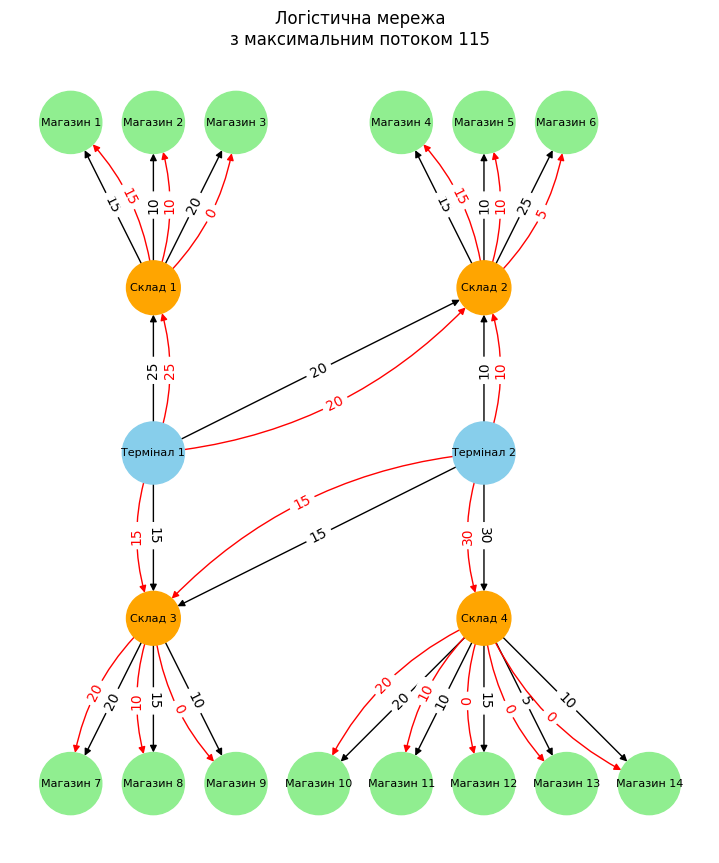

In [2]:
sources = ["Термінал 1", "Термінал 2"]
sinks = [
    "Магазин 1",
    "Магазин 2",
    "Магазин 3",
    "Магазин 4",
    "Магазин 5",
    "Магазин 6",
    "Магазин 7",
    "Магазин 8",
    "Магазин 9",
    "Магазин 10",
    "Магазин 11",
    "Магазин 12",
    "Магазин 13",
    "Магазин 14",
]


# Для спрощення алгоритму додамо додаткові вузли super_source та super_sink
super_source = "Source"
super_sink = "Sink"

# Додаємо ребра від SuperSource до джерел
for source in sources:
    G.add_edge(super_source, source, capacity=float("Inf"))

# Додаємо ребра від стоків до super_sink
for sink in sinks:
    G.add_edge(sink, super_sink, capacity=float("Inf"))


# Функція для знаходження максимального потоку (Едмондса-Карпа)
def max_flow_edmonds_karp(G, source, sink):
    flow_value, flow_dict = nx.maximum_flow(
        G, source, sink, flow_func=nx.algorithms.flow.edmonds_karp
    )
    return flow_value, flow_dict


# Знаходимо максимальний потік
max_flow, flow_distribution = max_flow_edmonds_karp(G, super_source, super_sink)

# Знаходимо максимальні потоки між кожним терміналом та магазином
max_flows = []

for source, sink_dict in flow_distribution.items():
    if source != super_source:
        for sink, flow in sink_dict.items():
            if sink != super_sink:
                max_flows.append([source, sink, flow])

# Створюємо DataFrame з максимальними потоками
max_flows_df = pd.DataFrame(max_flows, columns=["Source", "Sink", "Flow"])

# pprint(max_flows)  # Display the list of max flows
print(max_flows_df)  # Display the DataFrame of max flows

# Видаляємо додаткові вузли, які потрібні лише для спрощення алгоритму
G.remove_node(super_source)
G.remove_node(super_sink)

# pprint(flow_distribution)

# Відображаємо граф з потоком
draw_graph(G, flow_distribution, max_flow)

Логістична мережа, побудована за допомогою алгоритму Едмондса-Карпа не є оптимальною: частина магазинів не отримують товари.

Для виправлення ситуації необхідно збільшити пропускну здатність від терміналів до складів.